In [26]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
emp_df=pd.read_csv('Datasets/HR_comma_sep1.csv')
emp_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
emp_df.shape 

(14999, 10)

In [4]:
emp_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Pre processing the data

In [5]:
#create a copy of dataframe
emp_df_rev=pd.DataFrame.copy(emp_df)

In [6]:
emp_df_rev.shape

(14999, 10)

In [7]:
emp_df_rev.isnull().sum()# atleast a numerical variable might not be having a  missing value. 

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
for i in emp_df_rev.columns:
    print({i:emp_df_rev[i].unique()}) # here we are manually check is their any special characters in dataset 

{'satisfaction_level': array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])}
{'last_evaluation': array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63,

In [9]:
emp_df_rev.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [10]:
emp_df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
emp_df_rev.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
emp_df_rev.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [16]:
emp_df_rev.groupby('Department').sum()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
IT,758.46,879.55,4683,248119,4256,164,273,3
RandD,487.80,560.44,3033,158030,2650,134,121,27
accounting,446.51,550.49,2934,154292,2702,96,204,14
hr,442.52,523.84,2701,146828,2480,89,215,15
management,391.45,456.12,2432,126787,2711,103,91,69
marketing,530.76,614.23,3164,171073,3063,138,203,43
product_mng,558.91,644.71,3434,180369,3135,132,198,0
sales,2543.81,2938.23,15634,831773,14631,587,1014,100
support,1378.19,1611.81,8479,447490,7563,345,555,20


In [15]:
emp_df_rev.groupby('Department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


- According to number of employees management	got 10 %  ,sales got 0.02 % 
- But in management 91 numbers of employees left and in sales 1014 which higest among all the departments


In [18]:
emp_df_rev['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [20]:
emp_df_rev['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

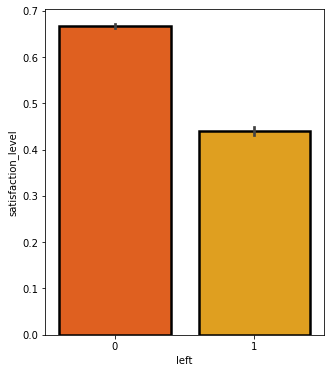

In [35]:
fig =plt.figure(figsize=(5,6))
sns.barplot(x='left',y='satisfaction_level',data=emp_df_rev,linewidth=2.5,edgecolor="black",palette='autumn')

<AxesSubplot:xlabel='promotion_last_5years', ylabel='satisfaction_level'>

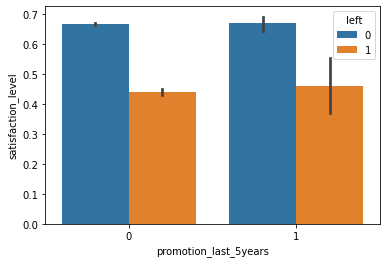

In [31]:
sns.barplot(x='promotion_last_5years',y='satisfaction_level',data=emp_df_rev,hue='left')

- Those who did not left means the blue color their satisfaction  level was 65% eventhough they did not get promoted and those who left  means the orange color their satisfaction level was below 50 %

- Now those who got promoted they did not left the company beacuse their satifaction level was 65 % and those who left the company even though they got promoted their satisfaction level was below 50% ,so I think they wanted more promotion.

In [38]:
colname=[]
for x in emp_df_rev.columns:
    if emp_df_rev[x].dtype=='object':
        colname.append(x)
colname 

['Department', 'salary']

In [39]:
#for preprocessing the data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
"""
-It will try storing all of the unique values from that (colname)
variable as the key and it will try associating numeric value 
along with it.
-Those number values that assign, are going to be in ascending order.
"""
for x in colname:
    emp_df_rev[x]=le.fit_transform(emp_df_rev[x])
    
    le_name_mapping=dict(zip(le.classes_, le.transform(le.classes_)))
    print('feature',x)
    print('mapping',le_name_mapping)

feature Department
mapping {'IT': 0, 'RandD': 1, 'accounting': 2, 'hr': 3, 'management': 4, 'marketing': 5, 'product_mng': 6, 'sales': 7, 'support': 8, 'technical': 9}
feature salary
mapping {'high': 0, 'low': 1, 'medium': 2}


In [40]:
# splitting the train set into dependent and independent sets
X=emp_df_rev.drop("left",axis=1)
Y=emp_df_rev["left"]

In [41]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [42]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [43]:
X.shape

(14999, 9)

In [44]:
Y.shape

(14999,)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)

X=scaler.transform(X)

print(X)


[[-0.93649469 -1.08727529 -1.46286291 ... -0.14741182  0.39372503
  -0.55495458]
 [ 0.75281433  0.84070693  0.97111292 ... -0.14741182  0.39372503
   1.04300352]
 [-2.02247906  0.95755433  2.59376348 ... -0.14741182  0.39372503
   1.04300352]
 ...
 [-0.97671633 -1.08727529 -1.46286291 ... -0.14741182  0.74231612
  -0.55495458]
 [-2.02247906  1.42494396  1.7824382  ... -0.14741182  0.74231612
  -0.55495458]
 [-0.97671633 -1.14569899 -1.46286291 ... -0.14741182  0.74231612
  -0.55495458]]


In [46]:
Y=Y.astype(int)

# Runnig a basic model

In [47]:
from sklearn.model_selection import train_test_split

#split the data  into test and train 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,
                                                 random_state=10)

In [48]:
from sklearn.linear_model import LogisticRegression
#creating a model
classifier=LogisticRegression()

#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [50]:
"""
if you want to checkout what is the intercept and the slope coef value
"""

print(list(zip(emp_df_rev.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)
"""
-here i am just trying to print the intercpet and  the slope coef value,
and zipping them with the column names because if i don't zip with column names
it will be difficult to relate for which variable the slope coef value is assign.

"""

[('satisfaction_level', -1.0180700489297498), ('last_evaluation', 0.11153854003466389), ('number_project', -0.37416573772700984), ('average_montly_hours', 0.2112556157611144), ('time_spend_company', 0.3272242892580753), ('Work_accident', -0.5128220916410731), ('left', -0.2112615364244289), ('promotion_last_5years', 0.09602605469864836), ('Department', 0.0205820935949473)]
[-1.5292189]


"\n-here i am just trying to print the intercpet and  the slope coef value,\nand zipping them with the column names because if i don't zip with column names\nit will be difficult to relate for which variable the slope coef value is assign.\n\n"

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)


print("CLASSIFICATION REPORT: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model : ",acc)


[[3178  230]
 [ 807  285]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3408
           1       0.55      0.26      0.35      1092

    accuracy                           0.77      4500
   macro avg       0.68      0.60      0.61      4500
weighted avg       0.74      0.77      0.74      4500

Accuracy of the model :  0.7695555555555555


# Accuracy of the logistic  model :  0.7695555555555555

# Adjusting the threshold

In [52]:
#store the predicted probabilities
y_pred_prob=classifier.predict_proba(X_test)
y_pred_prob

array([[0.89949422, 0.10050578],
       [0.63293374, 0.36706626],
       [0.50320384, 0.49679616],
       ...,
       [0.80383275, 0.19616725],
       [0.61468977, 0.38531023],
       [0.91561658, 0.08438342]])

In [55]:
y_pred_class=[]

for value in y_pred_prob[:,1]:
    if value > 0.40:
        y_pred_class.append(1)
        
    else:
        y_pred_class.append(0)
        
#print(y_pred_class)  

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)


print("CLASSIFICATION REPORT: ")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model : ",acc)

[[3057  351]
 [ 569  523]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3408
           1       0.60      0.48      0.53      1092

    accuracy                           0.80      4500
   macro avg       0.72      0.69      0.70      4500
weighted avg       0.78      0.80      0.79      4500

Accuracy of the model :  0.7955555555555556


# Accuracy of the model  by adjusting the threshold:  0.7955555555555556


In [57]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine=np.where(y_pred_prob[:,1]>a,1,0)
    cfm=confusion_matrix(Y_test,predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold",a,":",total_err," ,type 2 error :",
          cfm[1,0],",type 1 error :",cfm[0,1])

Errors at threshold 0.4 : 920  ,type 2 error : 569 ,type 1 error : 351
Errors at threshold 0.41000000000000003 : 931  ,type 2 error : 597 ,type 1 error : 334
Errors at threshold 0.42000000000000004 : 954  ,type 2 error : 635 ,type 1 error : 319
Errors at threshold 0.43000000000000005 : 976  ,type 2 error : 675 ,type 1 error : 301
Errors at threshold 0.44000000000000006 : 999  ,type 2 error : 705 ,type 1 error : 294
Errors at threshold 0.45000000000000007 : 1014  ,type 2 error : 734 ,type 1 error : 280
Errors at threshold 0.4600000000000001 : 1040  ,type 2 error : 771 ,type 1 error : 269
Errors at threshold 0.4700000000000001 : 1044  ,type 2 error : 787 ,type 1 error : 257
Errors at threshold 0.4800000000000001 : 1049  ,type 2 error : 799 ,type 1 error : 250
Errors at threshold 0.4900000000000001 : 1042  ,type 2 error : 806 ,type 1 error : 236
Errors at threshold 0.5000000000000001 : 1037  ,type 2 error : 807 ,type 1 error : 230
Errors at threshold 0.5100000000000001 : 1026  ,type 2 err

# KNN

In [62]:
(np.sqrt(len(X_train))) # 102 neighbors

102.46462804304713

In [66]:
#predicting using the KNeighbors_classifer
from sklearn.neighbors import KNeighborsClassifier

model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                               metric='euclidean')
#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

#prediction
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (1, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0),

In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)


print("CLASSIFICATION REPORT: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model : ",acc)

[[3213  195]
 [ 152  940]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3408
           1       0.83      0.86      0.84      1092

    accuracy                           0.92      4500
   macro avg       0.89      0.90      0.90      4500
weighted avg       0.92      0.92      0.92      4500

Accuracy of the model :  0.9228888888888889


In [68]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(50,150):
    model_KNN=KNeighborsClassifier(n_neighbors=K,metric="euclidean")
    model_KNN.fit(X_train,Y_train)
    Y_pred=model_KNN.predict(X_test)
    print("Accuracy is",[accuracy_score(Y_test,Y_pred)],"for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

Accuracy is [0.932] for K-Value: 50
Accuracy is [0.9308888888888889] for K-Value: 51
Accuracy is [0.9315555555555556] for K-Value: 52
Accuracy is [0.9311111111111111] for K-Value: 53
Accuracy is [0.932] for K-Value: 54
Accuracy is [0.9313333333333333] for K-Value: 55
Accuracy is [0.9317777777777778] for K-Value: 56
Accuracy is [0.9297777777777778] for K-Value: 57
Accuracy is [0.9302222222222222] for K-Value: 58
Accuracy is [0.9295555555555556] for K-Value: 59
Accuracy is [0.9304444444444444] for K-Value: 60
Accuracy is [0.9302222222222222] for K-Value: 61
Accuracy is [0.9306666666666666] for K-Value: 62
Accuracy is [0.9295555555555556] for K-Value: 63
Accuracy is [0.9306666666666666] for K-Value: 64
Accuracy is [0.9297777777777778] for K-Value: 65
Accuracy is [0.93] for K-Value: 66
Accuracy is [0.9282222222222222] for K-Value: 67
Accuracy is [0.9291111111111111] for K-Value: 68
Accuracy is [0.9275555555555556] for K-Value: 69
Accuracy is [0.9284444444444444] for K-Value: 70
Accuracy is

In [69]:
for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print(k,":",my_dict[k])

50 : 0.932
54 : 0.932


In [80]:
#predicting using the KNeighbors_classifer
from sklearn.neighbors import KNeighborsClassifier

model_KNN=KNeighborsClassifier(n_neighbors=50,
                               metric='manhattan')
#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

#prediction
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (1, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0),

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)


print("CLASSIFICATION REPORT: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model : ",acc)

[[3248  160]
 [ 123  969]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3408
           1       0.86      0.89      0.87      1092

    accuracy                           0.94      4500
   macro avg       0.91      0.92      0.92      4500
weighted avg       0.94      0.94      0.94      4500

Accuracy of the model :  0.9371111111111111


# Accuracy of the  KNN model :  0.9371111111111111


#  Basic DT model

In [84]:
#predicting the decision tree classifier

from sklearn.tree import DecisionTreeClassifier

#DT_model=DecisionTreeClassifier(criterion="gini",random_state=10,min_samples_leaf=5,max_depth=10)
DT_model=DecisionTreeClassifier(criterion="gini",random_state=10)
#fit the model on the data and predict the values
DT_model.fit(X_train,Y_train)
Y_pred=DT_model.predict(X_test)
print(Y_pred)
#print(list(zip(Y_test,Y_pred)))


[0 1 0 ... 1 0 0]


In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)


print("CLASSIFICATION REPORT: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model : ",acc)

[[3343   65]
 [  57 1035]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3408
           1       0.94      0.95      0.94      1092

    accuracy                           0.97      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500

Accuracy of the model :  0.9728888888888889


In [90]:
DT_model.score(X_train,Y_train)

1.0

In [88]:
print(list(zip(emp_df_rev.columns,DT_model.feature_importances_)))

[('satisfaction_level', 0.4926158625151114), ('last_evaluation', 0.151405514156333), ('number_project', 0.10763635991170593), ('average_montly_hours', 0.0916733439235909), ('time_spend_company', 0.1432368811056566), ('Work_accident', 0.0013824184495977235), ('left', 2.1895922920803295e-05), ('promotion_last_5years', 0.008286251540866454), ('Department', 0.0037414724742171387)]


# Accuracy of the  DT model :  0.9728888888888889

# SVM

In [91]:
from sklearn.svm import SVC

svc_model=SVC(kernel="rbf",C=100,gamma=0.1)
svc_model.fit(X_train,Y_train)

Y_pred=svc_model.predict(X_test)
print(list(Y_pred))


[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

In [92]:
svc_model.score(X_train,Y_train)

0.9841889703781312

In [93]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)


print("CLASSIFICATION REPORT: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model : ",acc)

[[3348   60]
 [ 101  991]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3408
           1       0.94      0.91      0.92      1092

    accuracy                           0.96      4500
   macro avg       0.96      0.94      0.95      4500
weighted avg       0.96      0.96      0.96      4500

Accuracy of the model :  0.9642222222222222


# Accuracy of the  SVM model :  0.9642222222222222